### Which UCLs consistently meet or fail to meet the 85% or 90% response time targets for Code 1 incidents?

In [105]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [107]:
# Load the provided CSV files
ambulance2018_dataset = Path("Soheil_Data/ambulance2018_dataset.csv")
ambulance2019_dataset = Path("Soheil_Data/ambulance2019_dataset.csv")

In [109]:
# Read the files
ambulance_2018_dataset = pd.read_csv(ambulance2018_dataset)
ambulance_2019_dataset = pd.read_csv(ambulance2019_dataset)

In [111]:
# Removing '%' and converting the 'percentage <= 15 minutes' columns to numeric for comparison
ambulance_2018_dataset['%<=15mins'] = ambulance_2018_dataset['%<=15mins'].str.replace('%', '').astype(float)
ambulance_2019_dataset['%<=15mins'] = ambulance_2019_dataset['%<=15mins'].str.replace('%', '').astype(float)

# Combining the 2018 and 2019 data for easier analysis

combined_data = pd.concat([ambulance_2018_dataset[['UCL Name', '%<=15mins']],
                           ambulance_2019_dataset[['UCL Name', '%<=15mins']]], 
                          keys=['2018', '2019'], names=['Year']).reset_index()
combined_data.head()


,Year,level_1,UCL Name,%<=15mins
0,2018,0,Albury - Wodonga (Wodonga Part),91.35
1,2018,1,Bacchus Marsh,79.85
2,2018,2,Bairnsdale,85.61
3,2018,3,Ballarat,89.32
4,2018,4,Benalla,84.08


In [113]:
# Calculating the mean response time performance across the two years

mean_performance = combined_data.groupby('UCL Name')['%<=15mins'].mean().reset_index()
mean_performance.head(10)


,UCL Name,%<=15mins
0,Albury - Wodonga (Wodonga Part),91.125
1,Bacchus Marsh,81.625
2,Bairnsdale,84.855
3,Ballarat,90.260
4,Benalla,80.240
5,Bendigo,86.825
6,Castlemaine,72.215
7,Colac,85.785
8,Drouin,79.950
9,Drysdale - Clifton Springs,83.540


In [115]:
# Identifying UCLs that meet or fail the 85% and 90% targets
mean_performance['Performance'] = mean_performance['%<=15mins'].apply(
    lambda x: 'Meet 90% Target' if x >= 90 else ('Fail 85% Target' if x < 85 else 'Between 85%-90%')
)

# Counting the number of UCLs that meet the 90%, fail the 85%, or fall in between

performance_counts = mean_performance['Performance'].value_counts()
performance_counts

Performance
Fail 85% Target    18
Between 85%-90%    15
Meet 90% Target     9
Name: count, dtype: int64

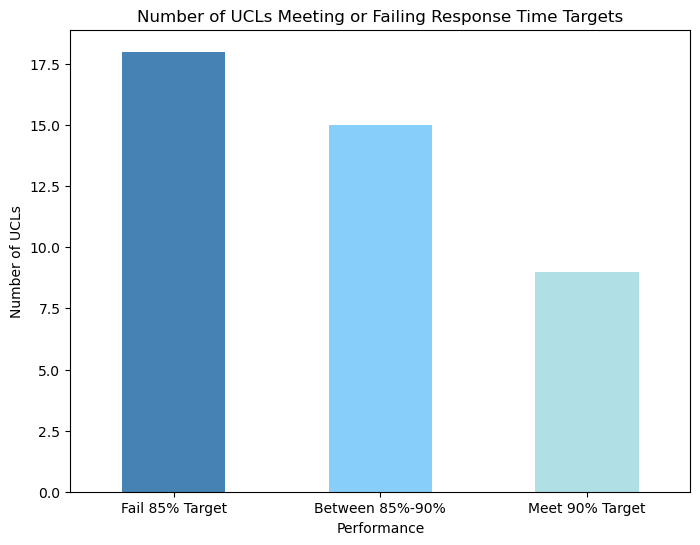

In [117]:
# Bar chart with lighter shades of blue
plt.figure(figsize=(8, 6))
performance_counts.plot(kind='bar', color=['#4682b4', '#87cefa', '#b0e0e6'])  # Light blue shades
plt.title('Number of UCLs Meeting or Failing Response Time Targets')
plt.ylabel('Number of UCLs')
plt.xticks(rotation=0)
plt.savefig("Soheil_Data/TotalNumber_BarChart_LightBlue.png")
plt.show()

In [119]:
# Displaying the first few rows of the performance table for review
mean_performance.head()

,UCL Name,%<=15mins,Performance
0,Albury - Wodonga (Wodonga Part),91.125,Meet 90% Target
1,Bacchus Marsh,81.625,Fail 85% Target
2,Bairnsdale,84.855,Fail 85% Target
3,Ballarat,90.260,Meet 90% Target
4,Benalla,80.240,Fail 85% Target


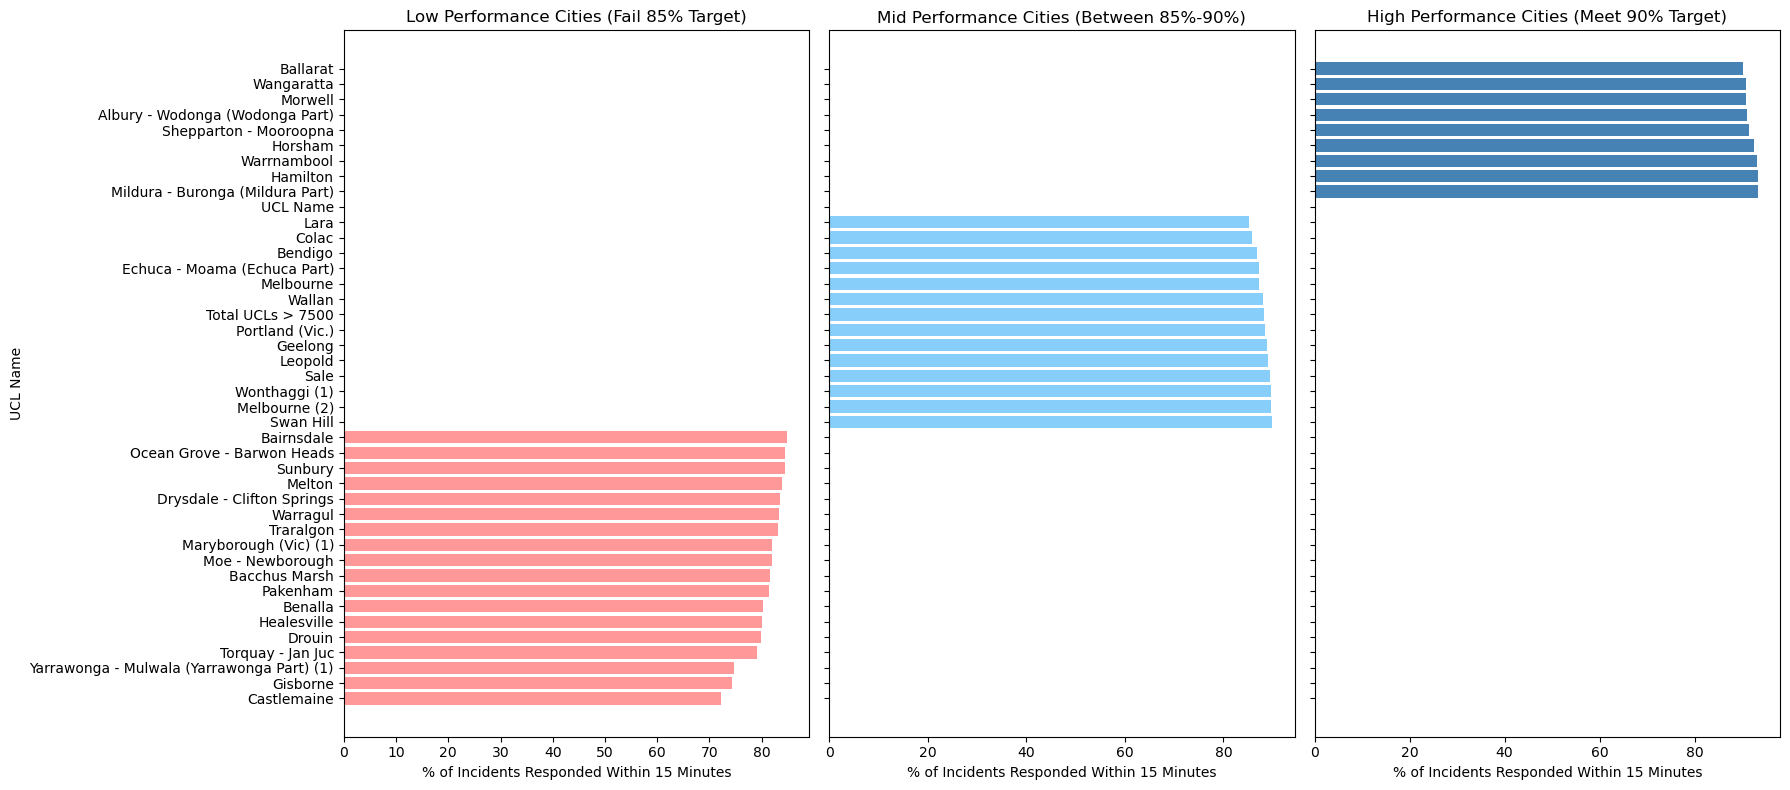

In [121]:
# Filtering for low, mid, and high performance UCLs
low_performance = mean_performance[mean_performance['Performance'] == 'Fail 85% Target'].sort_values(by='%<=15mins', ascending=True)
mid_performance = mean_performance[mean_performance['Performance'] == 'Between 85%-90%'].sort_values(by='%<=15mins', ascending=False)
high_performance = mean_performance[mean_performance['Performance'] == 'Meet 90% Target'].sort_values(by='%<=15mins', ascending=False)

# Now, plot the results in subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 8), sharey=True)

# Plotting low-performance UCLs (Fail 85% Target) 
axes[0].barh(low_performance['UCL Name'], low_performance['%<=15mins'], color='#ff9999')
axes[0].set_title('Low Performance Cities (Fail 85% Target)')
axes[0].set_xlabel('% of Incidents Responded Within 15 Minutes')
axes[0].set_ylabel('UCL Name')

# Plotting mid-performance UCLs (Between 85%-90%) 
axes[1].barh(mid_performance['UCL Name'], mid_performance['%<=15mins'], color='#87cefa')
axes[1].set_title('Mid Performance Cities (Between 85%-90%)')
axes[1].set_xlabel('% of Incidents Responded Within 15 Minutes')

# Plotting high-performance UCLs (Meet 90% Target) 
axes[2].barh(high_performance['UCL Name'], high_performance['%<=15mins'], color='#4682b4')
axes[2].set_title('High Performance Cities (Meet 90% Target)')
axes[2].set_xlabel('% of Incidents Responded Within 15 Minutes')

# layout and displaying the plot
plt.tight_layout()
plt.savefig("Soheil_Data/low_mid_high.png")
plt.show()
